In [97]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
#import data
covid_data = pd.read_csv('covid19_Confirmed_dataset.csv')
covid_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [99]:
covid_data.shape

(266, 104)

In [100]:
df1 = covid_data.drop(['Lat', 'Long',"Province/State"], axis=1)
df1.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [101]:
#aggrigate by using group by fuction
corona_case_aggregate = df1.groupby('Country/Region').sum()
corona_case_aggregate.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [102]:
corona_case_aggregate.shape

(187, 100)

In [103]:
#to calculate with further relation with other file we need to find maximum chnage 
country = list(corona_case_aggregate.index)
max_infected_rate = []
for c in country:
    max_infected_rate.append(corona_case_aggregate.loc[c].diff().max())

corona_case_aggregate["max_infected_rate"] = max_infected_rate

In [104]:
corona_case_aggregate.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infected_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [105]:
max_inf_df = corona_case_aggregate[["max_infected_rate"]].reset_index()
max_inf_df.describe()


,max_infected_rate
count,187.000000
mean,1042.112299
std,3781.896944
min,1.000000
25%,19.000000
50%,73.000000
75%,355.500000
max,36188.000000


In [106]:
happiness_report = pd.read_csv("worldwide_happiness_report.csv")
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [107]:
happiness_report.drop(["Overall rank","Score","Generosity","Perceptions of corruption"],axis = 1, inplace = True)

In [108]:
happiness_report.set_index("Country or region", inplace = True)
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [109]:
happiness_report.shape
max_inf_df.set_index("Country/Region",inplace = True)

In [110]:
data_final = happiness_report.join(max_inf_df, how ="inner")

In [111]:
data_final

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max_infected_rate
Finland,1.340,1.587,0.986,0.596,267.0
Denmark,1.383,1.573,0.996,0.592,391.0
Norway,1.488,1.582,1.028,0.603,386.0
Iceland,1.380,1.624,1.026,0.591,99.0
Netherlands,1.396,1.522,0.999,0.557,1346.0
...,...,...,...,...,...
Rwanda,0.359,0.711,0.614,0.555,22.0
Tanzania,0.476,0.885,0.499,0.417,181.0
Afghanistan,0.350,0.517,0.361,0.000,232.0
Central African Republic,0.026,0.000,0.105,0.225,31.0


In [112]:
data_final.corr()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max_infected_rate
GDP per capita,1.000000,0.759468,0.863062,0.394603,0.250118
Social support,0.759468,1.000000,0.765286,0.456246,0.191958
Healthy life expectancy,0.863062,0.765286,1.000000,0.427892,0.289263
Freedom to make life choices,0.394603,0.456246,0.427892,1.000000,0.078196
max_infected_rate,0.250118,0.191958,0.289263,0.078196,1.000000


<Axes: xlabel='GDP per capita', ylabel='max_infected_rate'>

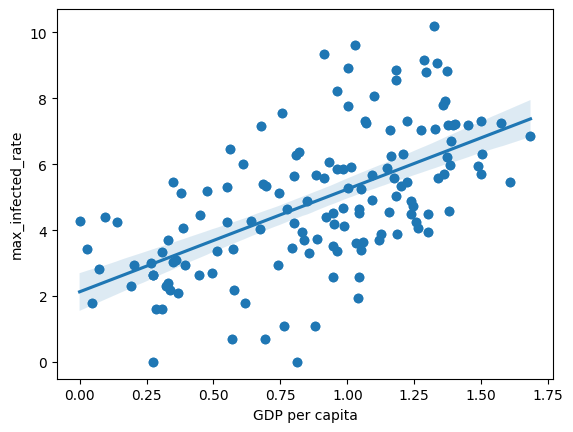

In [113]:
#plot visulisation
x = data_final["GDP per capita"]
y = data_final["max_infected_rate"]
z = data_final["Social support"]
a = data_final["Healthy life expectancy"]
b = data_final["Freedom to make life choices"]
plt.scatter(x, np.log(y)) #log scaling > as the value of gdp in decimal > observation positive correlation
sns.regplot(data=data_final, x=x, y=np.log(y)) 

<Axes: xlabel='Social support', ylabel='max_infected_rate'>

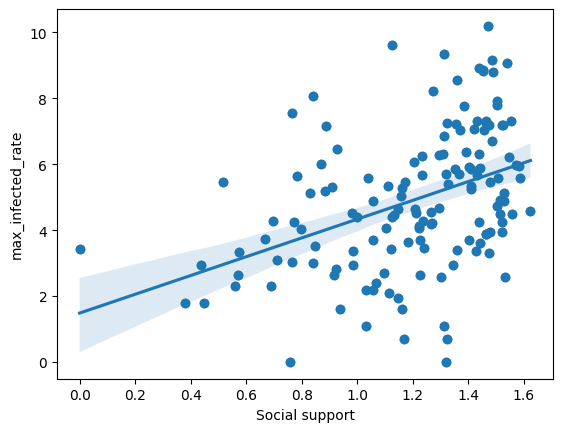

In [114]:
plt.scatter(z, np.log(y))
sns.regplot(data=data_final, x=z, y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='max_infected_rate'>

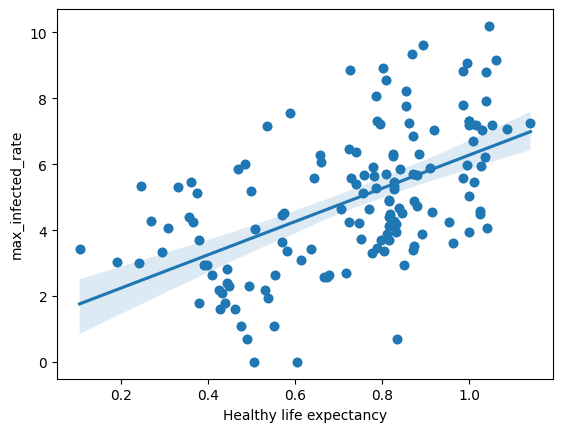

In [115]:
plt.scatter(a, np.log(y))
sns.regplot(data=data_final, x=a, y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='max_infected_rate'>

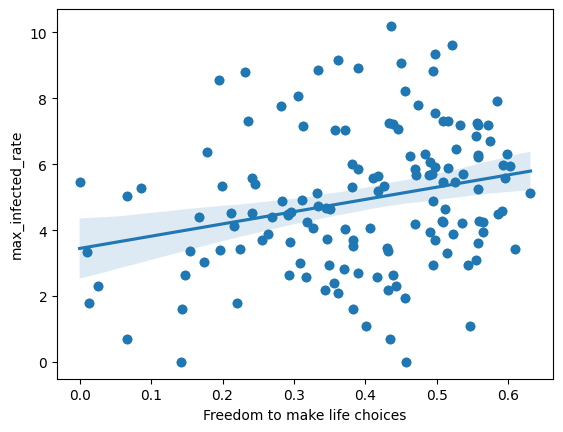

In [116]:
plt.scatter(b, np.log(y))
sns.regplot(data=data_final, x=b, y=np.log(y))